# Data Science And Business Analytics Intern

###### Name:Rutuja Pradip Yeole

###### #Task6 Prediction Using Decision Tree Algorithm

###### @The Spark Foundation #Task1 #GRIPSEP21

In [1]:
#Import all required libraris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

In [2]:
#Reading data from remote link
url="C:/Users/Admin/Downloads/Iris.csv"
data=pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
#Remove unwanted column
remove=['Id']
new_data=data.drop(columns=remove)

In [4]:
#New clean data information
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


###### #Now separate the independent and target variables

In [5]:
input_cols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
output_cols=['Species']

In [6]:
x=new_data[input_cols]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y=new_data[output_cols]
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [8]:
print(x.shape,y.shape)

(150, 4) (150, 1)


In [9]:
#Import librari to randomly shuffle new_data
from sklearn.utils import shuffle
new_data=shuffle(new_data,random_state=15)

###### split new_data into Train and Test

In [10]:
split=int(0.5*new_data.shape[0])
train_data=new_data[:split]
test_data=new_data[split:]
test_data=test_data.reset_index(drop=True)

In [11]:
print(train_data.shape,test_data.shape)

(75, 5) (75, 5)


###### Implementing Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
sk_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [13]:
#Training to data
sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [14]:
y_pred=sk_tree.predict(test_data[input_cols])
print(y_pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-set

In [15]:
y_actual=test_data[output_cols]
y_actual=y_actual.values
y_actual=y_actual.reshape((-1,))

In [16]:
print(y_actual.shape,y_pred.shape)

(75,) (75,)


###### #Check the Accuracy:

In [17]:
from sklearn import metrics

In [18]:
#For Train_data:
y_pred=sk_tree.predict(train_data[input_cols])

In [19]:
print("Train Result:\n")
print("accuracy score: {0:4f}\n".format(metrics.accuracy_score(train_data[output_cols],y_pred)))
print("Classification Report: \n {}\n".format(metrics.classification_report(train_data[output_cols],y_pred)))
print("Confusion Matrix: \n {}\n".format(metrics.confusion_matrix(train_data[output_cols],y_pred)))

Train Result:

accuracy score: 1.000000

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       1.00      1.00      1.00        27
 Iris-virginica       1.00      1.00      1.00        26

       accuracy                           1.00        75
      macro avg       1.00      1.00      1.00        75
   weighted avg       1.00      1.00      1.00        75


Confusion Matrix: 
 [[22  0  0]
 [ 0 27  0]
 [ 0  0 26]]



In [20]:
#For Test_data:
y_pred=sk_tree.predict(test_data[input_cols])

In [21]:
print("Test Result:\n")
print("accuracy score: {0:4f}\n".format(metrics.accuracy_score(train_data[output_cols],y_pred)))
print("Classification Report: \n {}\n".format(metrics.classification_report(train_data[output_cols],y_pred)))
print("Confusion Matrix: \n {}\n".format(metrics.confusion_matrix(train_data[output_cols],y_pred)))

Test Result:

accuracy score: 0.333333

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       0.25      0.32      0.28        22
Iris-versicolor       0.38      0.30      0.33        27
 Iris-virginica       0.38      0.38      0.38        26

       accuracy                           0.33        75
      macro avg       0.34      0.33      0.33        75
   weighted avg       0.34      0.33      0.34        75


Confusion Matrix: 
 [[ 7  6  9]
 [12  8  7]
 [ 9  7 10]]



###### #Conclusion: The Accuracy of Decison Tree Model is 33.33%

###### Visualising A Decision Tree

In [22]:
Y=new_data['Species']

In [23]:
from sklearn.tree import plot_tree

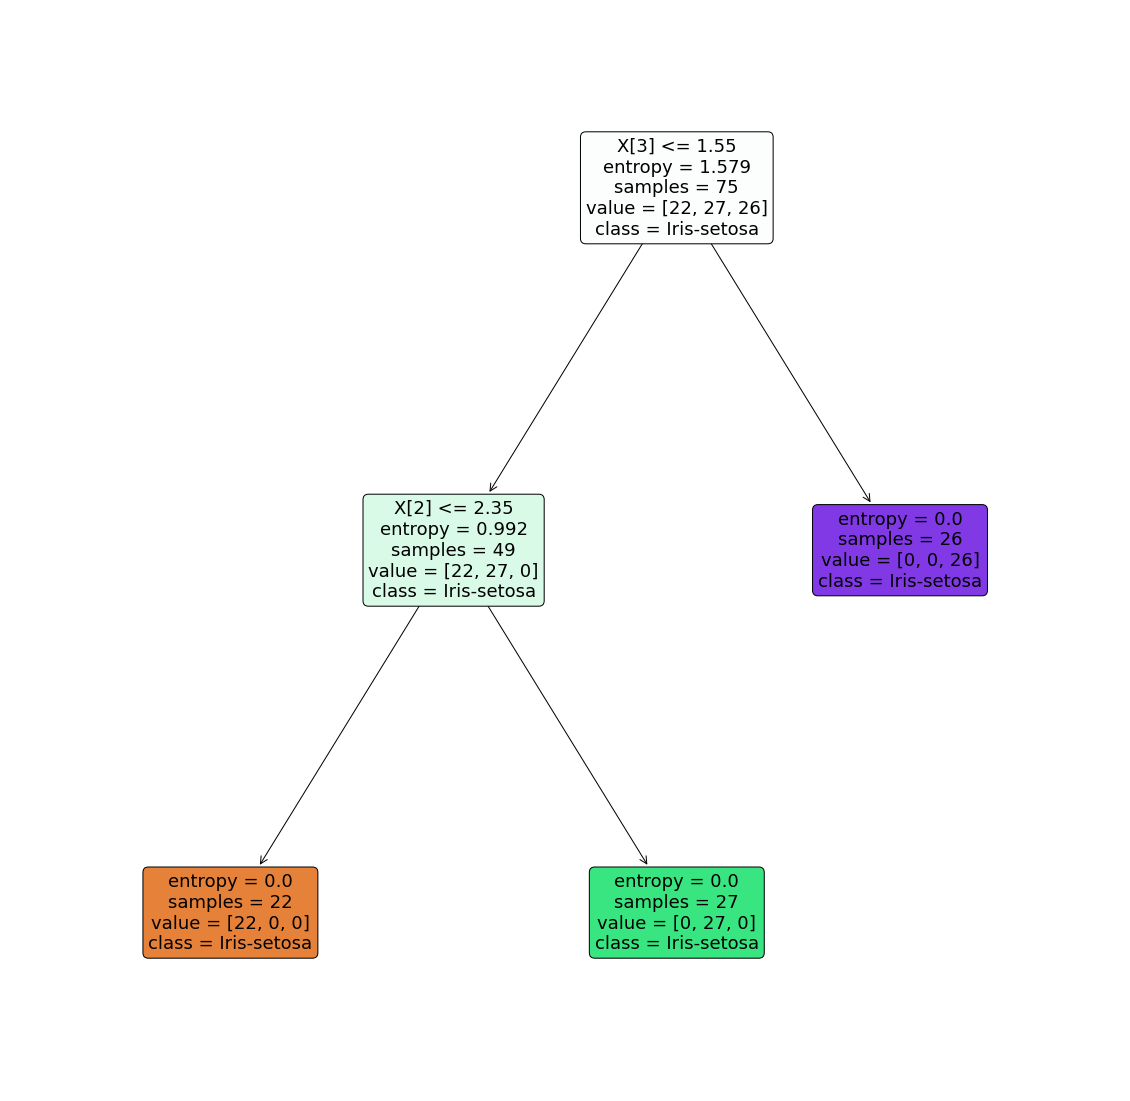

In [25]:
plt.figure(figsize=(20,20))
tree=plot_tree(sk_tree,class_names=Y,rounded = True, filled = True, fontsize=18)
plt.show()

The ModelAccuracy of Decison Tree Model is 33.33% with thw 100% Accuracy of Train_data.

###### Thank_ you🙏